# **Pranav Singh Mahara**
# **21BBS0188**

# **Data Mining Theory**
# **DA 2**


Analyzing Theft crimes in Mumbai district...

Analyzing ARIMA Model...


<ipython-input-1-75b3b2316fb2>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = daily_crimes.resample('M').sum()


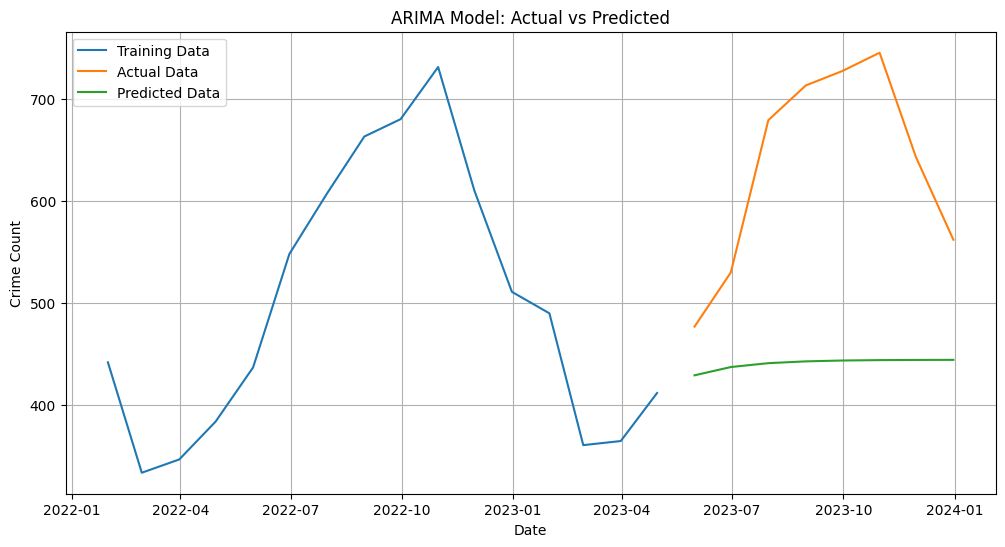

ARIMA RMSE: 213.39
ARIMA MAPE: 28.94%

Future 6 Months Predictions:
2024-01: 444 crimes
2024-02: 445 crimes
2024-03: 445 crimes
2024-04: 445 crimes
2024-05: 445 crimes
2024-06: 445 crimes

Analyzing AR Model...


<ipython-input-1-75b3b2316fb2>:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for date, pred in zip(pd.date_range(start=test.index[-1], periods=future_periods + 1, freq='M')[1:], future_predictions):


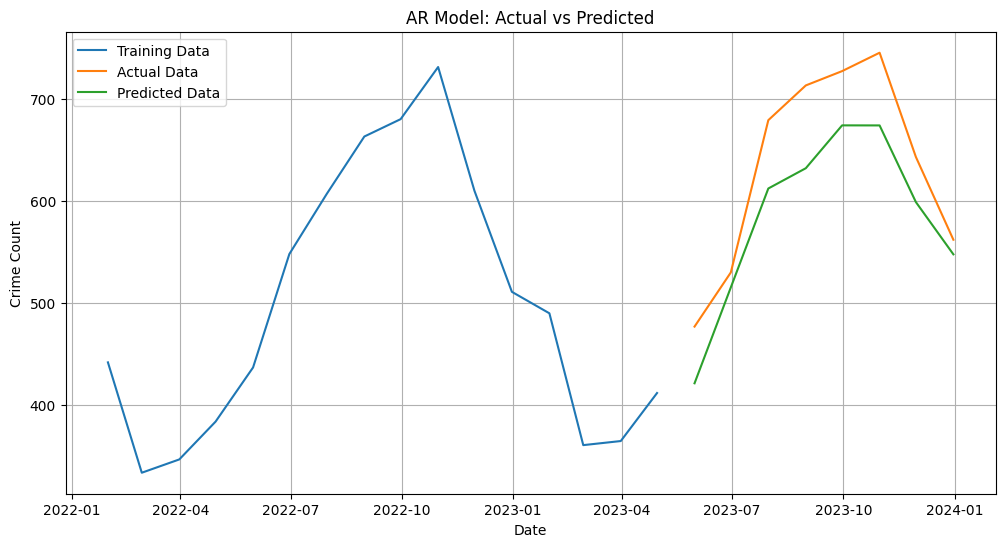

AR RMSE: 55.18
AR MAPE: 7.73%

Future 6 Months Predictions:
2024-01: 487 crimes
2024-02: 412 crimes
2024-03: 400 crimes
2024-04: 414 crimes
2024-05: 437 crimes
2024-06: 508 crimes

Performing Seasonal Decomposition...


<ipython-input-1-75b3b2316fb2>:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for date, pred in zip(pd.date_range(start=test.index[-1], periods=future_periods + 1, freq='M')[1:], future_predictions):


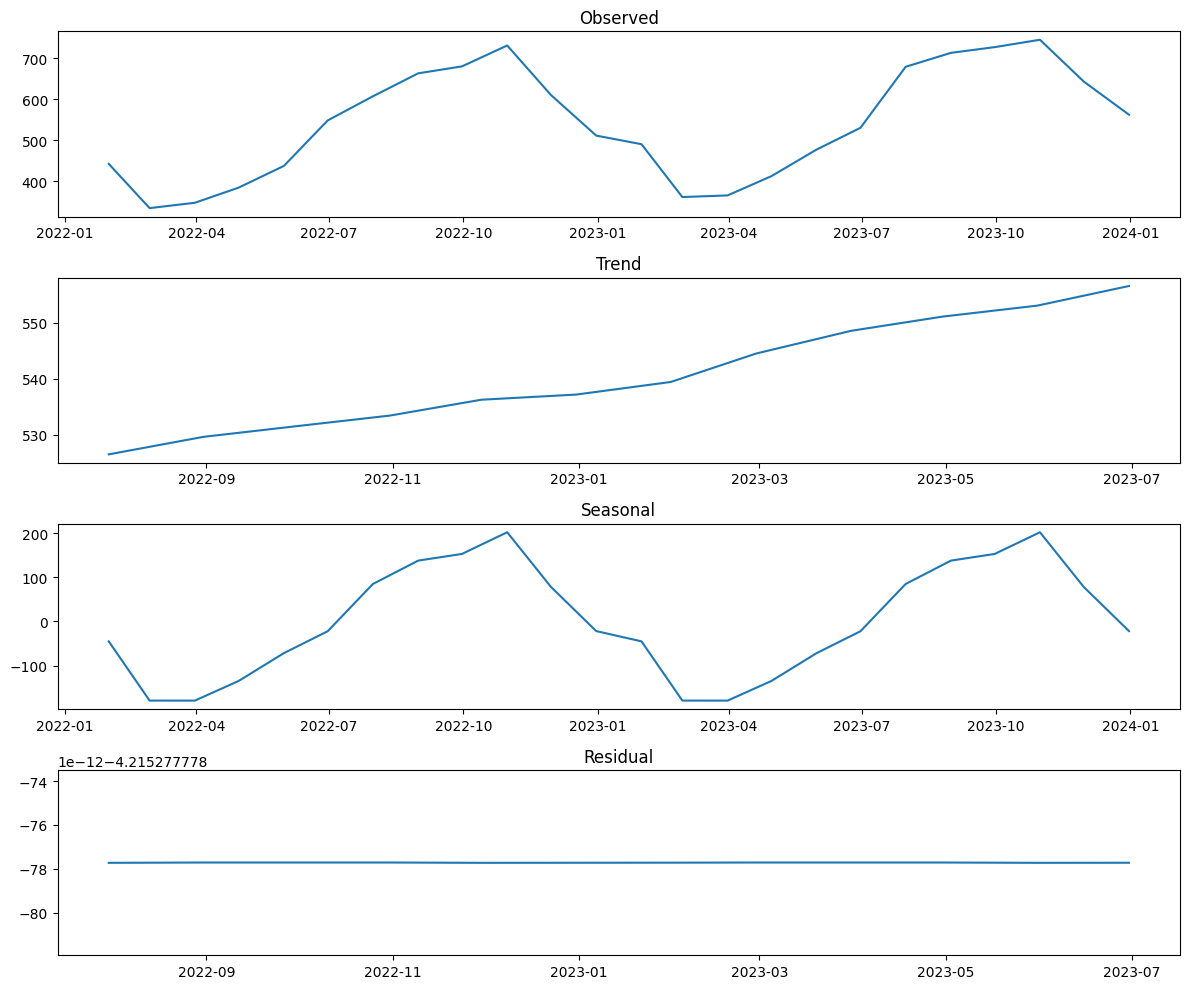

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = '/content/indian_crime_data_fixed.csv'
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])

def prepare_time_series(df, district=None, crime_type=None):


    if district:
        df = df[df['district'] == district]
    if crime_type:
        df = df[df['crime_type'] == crime_type]

    daily_crimes = df.groupby('date')['count'].sum().reset_index()
    daily_crimes = daily_crimes.set_index('date')

    monthly_crimes = daily_crimes.resample('M').sum()

    return monthly_crimes

def train_test_split(data, train_size=0.8):
    train_size = int(len(data) * train_size)
    train = data[:train_size]
    test = data[train_size:]
    return train, test

def fit_arima(train_data, order=(1, 1, 1)):
    model = ARIMA(train_data, order=order)
    results = model.fit()
    return results

def fit_ar(train_data, max_lags=None):
    if max_lags is None:
        max_lags = min(int(len(train_data) / 3), 12)

    model = AutoReg(train_data, lags=max_lags)
    results = model.fit()
    return results

def analyze_model(model_name, train, test, model, future_periods=6):

    predictions = model.predict(start=len(train), end=len(train) + len(test) - 1)
    rmse = sqrt(mean_squared_error(test, predictions))
    mape = np.mean(np.abs((test - predictions) / test)) * 100

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Data')
    plt.plot(test.index, predictions, label='Predicted Data')
    plt.title(f'{model_name} Model: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} MAPE: {mape:.2f}%")

    future_predictions = model.predict(start=len(train) + len(test), end=len(train) + len(test) + future_periods - 1)
    print(f"\nFuture {future_periods} Months Predictions:")
    for date, pred in zip(pd.date_range(start=test.index[-1], periods=future_periods + 1, freq='M')[1:], future_predictions):
        print(f"{date.strftime('%Y-%m')}: {pred:.0f} crimes")

    return rmse, mape

def main():

    district = 'Mumbai'
    crime_type = 'Theft'
    print(f"\nAnalyzing {crime_type} crimes in {district} district...")

    monthly_crimes = prepare_time_series(df, district=district, crime_type=crime_type)

    train, test = train_test_split(monthly_crimes['count'], train_size=0.7)

    print("\nAnalyzing ARIMA Model...")
    arima_model = fit_arima(train)
    analyze_model('ARIMA', train, test, arima_model)

    print("\nAnalyzing AR Model...")
    ar_model = fit_ar(train)
    analyze_model('AR', train, test, ar_model)

    print("\nPerforming Seasonal Decomposition...")
    decomposition = seasonal_decompose(monthly_crimes['count'], period=12)
    plt.figure(figsize=(12, 10))
    plt.subplot(411)
    plt.plot(decomposition.observed)
    plt.title('Observed')
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Enter the district (e.g., 'Mumbai'): Delhi
Enter the crime type (e.g., 'Theft'): Theft


<ipython-input-2-4f34961d6598>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = daily_crimes.resample('M').sum()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'



Fitting ARIMA model...

Making predictions...
RMSE: 108.63
MAPE: 28.48%


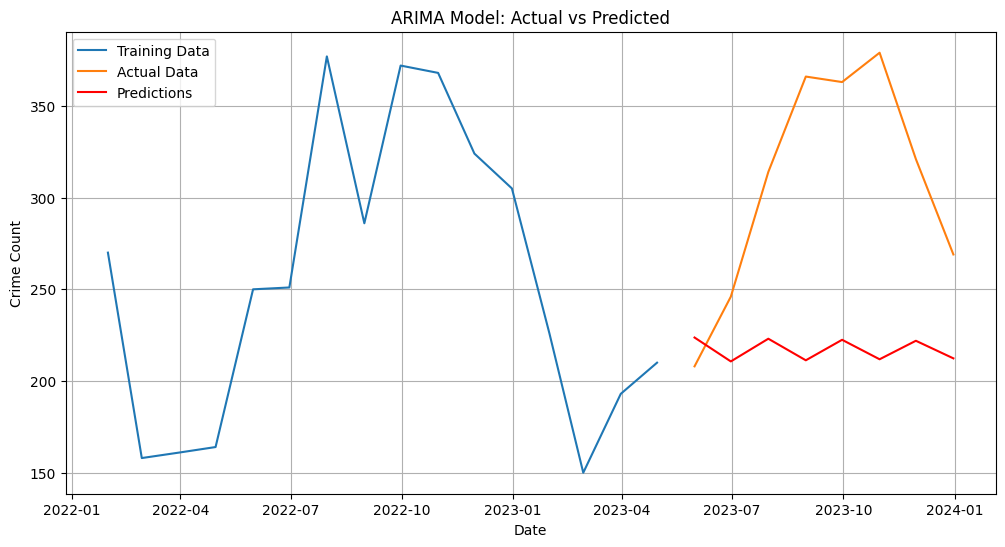


Future 6 Months Predictions:
Month 1: 224 crimes
Month 2: 211 crimes
Month 3: 223 crimes
Month 4: 211 crimes
Month 5: 222 crimes
Month 6: 212 crimes


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

def load_data(file_path):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    return df

def prepare_time_series(df, district, crime_type):
    df = df[(df['district'] == district) & (df['crime_type'] == crime_type)]
    daily_crimes = df.groupby('date')['count'].sum().reset_index()
    daily_crimes.set_index('date', inplace=True)
    monthly_crimes = daily_crimes.resample('M').sum()
    return monthly_crimes

def fit_arima(train_data, order=(1, 1, 1)):
    model = ARIMA(train_data, order=order)
    results = model.fit()
    return results

def make_predictions(model, train_data, test_data, future_periods=6):

    predictions = model.forecast(steps=len(test_data))
    rmse = sqrt(mean_squared_error(test_data, predictions))
    mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Actual Data')
    plt.plot(test_data.index, predictions, label='Predictions', color='red')
    plt.title('ARIMA Model: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    future_predictions = model.forecast(steps=future_periods)
    print(f"\nFuture {future_periods} Months Predictions:")
    for i, pred in enumerate(future_predictions, 1):
        print(f"Month {i}: {pred:.0f} crimes")

    return future_predictions

def main():

    file_path = '/content/indian_crime_data_fixed.csv'
    df = load_data(file_path)

    district = input("Enter the district (e.g., 'Mumbai'): ")
    crime_type = input("Enter the crime type (e.g., 'Theft'): ")


    monthly_crimes = prepare_time_series(df, district, crime_type)

    train_size = int(len(monthly_crimes) * 0.7)
    train_data = monthly_crimes['count'][:train_size]
    test_data = monthly_crimes['count'][train_size:]

    print("\nFitting ARIMA model...")
    arima_model = fit_arima(train_data)

    print("\nMaking predictions...")
    make_predictions(arima_model, train_data, test_data, future_periods=6)

if __name__ == "__main__":
    main()


Enter the district (e.g., 'Mumbai'): Delhi
Enter the crime type (e.g., 'Theft'): Theft


<ipython-input-10-c53ffa013046>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = daily_crimes.resample('M').sum()


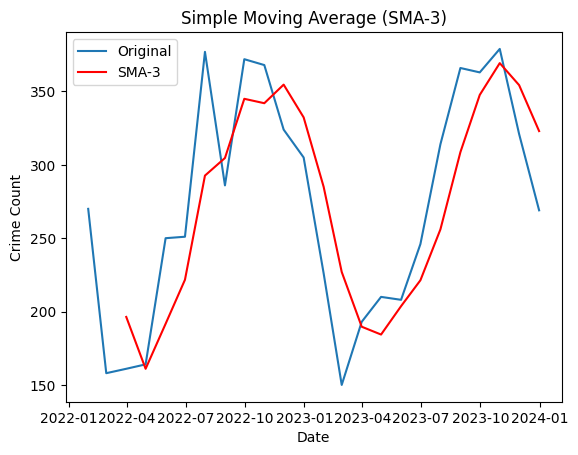

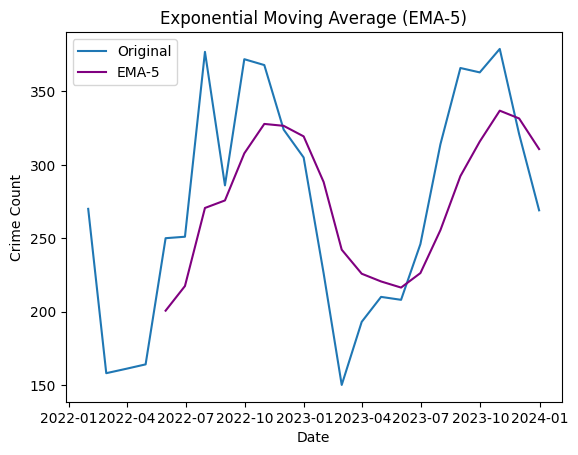

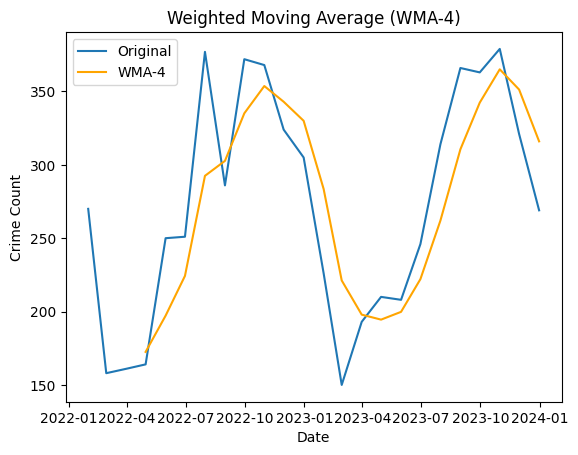

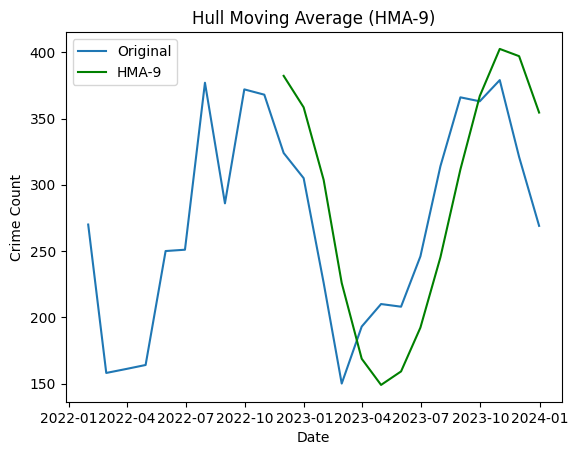

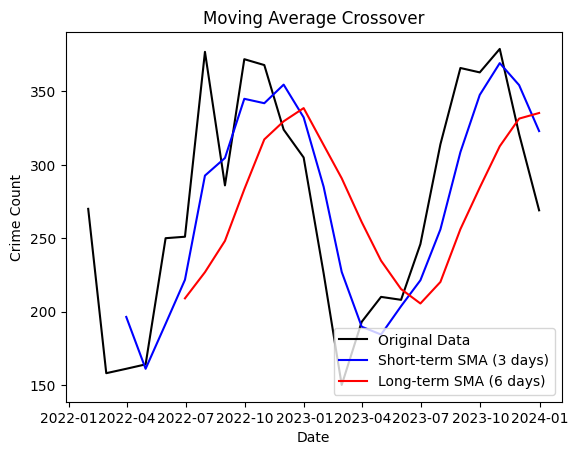

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

def load_data(file_path):
    file_path = '/content/indian_crime_data_fixed.csv'
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    return df

def prepare_time_series(df, district, crime_type):
    df = df[(df['district'] == district) & (df['crime_type'] == crime_type)]
    daily_crimes = df.groupby('date')['count'].sum().reset_index()
    daily_crimes.set_index('date', inplace=True)
    monthly_crimes = daily_crimes.resample('M').sum()
    return monthly_crimes

def plot_sma(data, window):
    sma = ta.sma(data, length=window)
    plt.plot(data.index, data, label='Original')
    plt.plot(sma.index, sma, label=f'SMA-{window}', color='red')
    plt.title(f'Simple Moving Average (SMA-{window})')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.show()

def plot_ema(data, span):
    ema = ta.ema(data, length=span)
    plt.plot(data.index, data, label='Original')
    plt.plot(ema.index, ema, label=f'EMA-{span}', color='purple')
    plt.title(f'Exponential Moving Average (EMA-{span})')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.show()

def plot_wma(data, window):
    wma = ta.wma(data, length=window)
    plt.plot(data.index, data, label='Original')
    plt.plot(wma.index, wma, label=f'WMA-{window}', color='orange')
    plt.title(f'Weighted Moving Average (WMA-{window})')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.show()

def plot_hma(data, window):
    hma = ta.hma(data, length=window)
    plt.plot(data.index, data, label='Original')
    plt.plot(hma.index, hma, label=f'HMA-{window}', color='green')
    plt.title(f'Hull Moving Average (HMA-{window})')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.show()

def plot_moving_average_crossover(data, short_window, long_window):
    short_ma = ta.sma(data, length=short_window)
    long_ma = ta.sma(data, length=long_window)

    plt.plot(data.index, data, label='Original Data', color='black')
    plt.plot(short_ma.index, short_ma, label=f'Short-term SMA ({short_window} days)', color='blue')
    plt.plot(long_ma.index, long_ma, label=f'Long-term SMA ({long_window} days)', color='red')
    plt.title('Moving Average Crossover')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.show()

def main():
    file_path = '/mnt/data/indian_crime_data_fixed.csv'
    df = load_data(file_path)

    district = input("Enter the district (e.g., 'Mumbai'): ")
    crime_type = input("Enter the crime type (e.g., 'Theft'): ")

    monthly_crimes = prepare_time_series(df, district, crime_type)['count']

    plot_sma(monthly_crimes, window=3)
    plot_ema(monthly_crimes, span=5)
    plot_wma(monthly_crimes, window=4)
    plot_hma(monthly_crimes, window=9)
    plot_moving_average_crossover(monthly_crimes, short_window=3, long_window=6)

if __name__ == "__main__":
    main()


In [8]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=7c3d398df0c4f7c8fe3edaf1026daab4750f92c53d68b938293703a6ad7eba3c
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
